# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

Invalid requirement: './python'
It looks like a path. File './python' does not exist.
You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="./Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=128, fc2_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.bn1 = nn.BatchNorm1d(state_size)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
#         xs = F.relu(self.fc1(self.bn1(state)))
#         #x = F.relu(self.fc1(state))
#         x = F.relu(self.fc2(xs))
#         return F.tanh(self.fc3(x))
    
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=64, fc2_units=32, fc3_units=16):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.bn1 = nn.BatchNorm1d(state_size)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        self.fc4.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
#         xs = F.relu(self.fcs1(self.bn1(state)))
#         x = torch.cat((xs, action), dim=1)
#         x = F.relu(self.fc2(x))
#         return self.fc3(x)
        xs = F.relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

In [7]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

# from model import Actor, Critic

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 1024        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
#         self.noise = OUNoise(action_size, random_seed)
        self.noise = [OUNoise(action_size, random_seed) for i in range(num_agents)]

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done, t):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE and t % 20 == 0:
            for i in range(10):
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            for i in range(action.shape[0]):
                action[i] += self.noise[i].sample()
                
        return np.clip(action, -1, 1)

    def reset(self):
        for i in range(len(self.noise)):
            self.noise[i].reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [ ]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=4)

Episode 100, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 1424, Time: 0.43
Episode 200, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 2844, Time: 0.44
Episode 300, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 4264, Time: 0.47
Episode 400, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 5684, Time: 0.45
Episode 500, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 7104, Time: 0.44
Episode 600, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 8524, Time: 0.46
Episode 700, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 9944, Time: 0.46
Episode 800, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 11364, Time: 0.46
Episode 900, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 12784, Time: 0.47
Episode 1000, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 1420

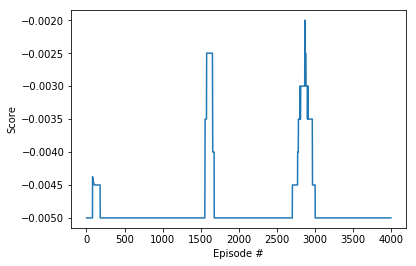

Episode 4100, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 58483, Time: 0.49
Episode 4200, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 59903, Time: 0.49
Episode 4300, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 61322, Time: 0.49
Episode 4400, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 62742, Time: 0.51
Episode 4500, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 64162, Time: 0.51
Episode 4600, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 65582, Time: 0.51
Episode 4700, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 67002, Time: 0.51
Episode 4800, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 68590, Time: 0.50
Episode 4900, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 70095, Time: 0.51
Episode 5000, Mean last 100: -0.00, Mean current: -0.00, Max: 0.00, Min: 

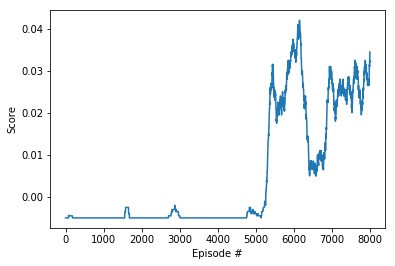

Episode 8100, Mean last 100: 0.04, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 147346, Time: 1.21
Episode 8200, Mean last 100: 0.04, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 150332, Time: 1.23
Episode 8300, Mean last 100: 0.03, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 153140, Time: 1.24
Episode 8400, Mean last 100: 0.02, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 155633, Time: 0.60
Episode 8500, Mean last 100: 0.03, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 158362, Time: 0.63
Episode 8600, Mean last 100: 0.04, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 161483, Time: 1.24
Episode 8700, Mean last 100: 0.05, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 164761, Time: 1.26
Episode 8800, Mean last 100: 0.05, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 168192, Time: 1.26
Episode 8900, Mean last 100: 0.05, Mean current: 0.10, Max: 0.10, Min: 0.09, Len: 171811, Time: 2.52
Episode 9000, Mean last 100: 0.05, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 1

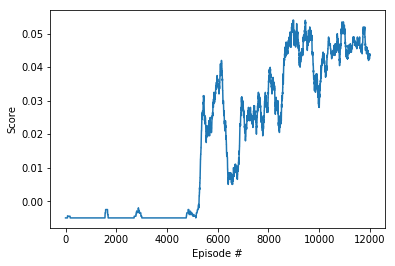

Episode 12100, Mean last 100: 0.05, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 277482, Time: 2.13
Episode 12200, Mean last 100: 0.05, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 280757, Time: 1.84
Episode 12300, Mean last 100: 0.05, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 283953, Time: 10.01
Episode 12400, Mean last 100: 0.05, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 287323, Time: 1.76
Episode 12500, Mean last 100: 0.05, Mean current: -0.00, Max: 0.00, Min: -0.01, Len: 290606, Time: 1.89
Episode 12600, Mean last 100: 0.05, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 293859, Time: 1.98
Episode 12700, Mean last 100: 0.05, Mean current: 0.05, Max: 0.10, Min: -0.01, Len: 297031, Time: 1.83
Episode 12800, Mean last 100: 0.04, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 300149, Time: 1.82
Episode 12900, Mean last 100: 0.04, Mean current: 0.05, Max: 0.09, Min: 0.00, Len: 303313, Time: 1.86
Episode 13000, Mean last 100: 0.04, Mean current: 0.05, Max: 0.09, Min: 0.

In [ ]:
import random
import torch
import numpy as np
from collections import deque
from itertools import count
import time

import matplotlib.pyplot as plt
%matplotlib inline


def ddpg(n_episodes=100000, print_every=100):
#     torch.load('checkpoint_actor.pth')
#     torch.load('checkpoint_critic.pth')
    
    import time, requests 
    old_time = time.time() 
    response = requests.request("GET", "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", headers={"Metadata-Flavor":"Google"})

    # agent = Agent(state_size=33, action_size=4, random_seed=2)
    state_size, action_size = brain.vector_observation_space_size, brain.vector_action_space_size
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    
    states = env_info.vector_observations
    state_size = states.shape[1]
    
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)
    agent1 = Agent(state_size=state_size, action_size=action_size, random_seed=4)

    scores_deque = deque(maxlen=print_every)
    scores_global = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        
        agent.reset()
        tick = time.time()
        i_step = 0
        
        if time.time() - old_time > 60: 
            old_time = time.time() 
            requests.request("POST", "https://nebula.udacity.com/api/v1/remote/keep-alive", headers={'Authorization': "STAR " + response.text})

        while i_step < 10000:
            states = env_info.vector_observations
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            rewards = env_info.rewards                         # get reward (for each agent)
            scores += rewards
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
#             for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
#                 agent.step(state, action, reward, next_state, done, i_step)
            
            agent.step(states[0], actions[0], rewards[0], next_states[0], dones[0], i_step)
            agent1.step(states[1], actions[1], rewards[1], next_states[1], dones[1], i_step)
            
            if i_step % print_every == 0:
                print('\rStep {}\tAverage Score: {:.2f}'.format(i_step, np.mean(scores)), end="")
            
            if np.any(dones):                                  # exit loop if episode finished
                break
            
#             states = next_states                               # roll over states to next time step
            i_step += 1
        
        score = np.mean(scores)
        scores_deque.append(score)
        scores_global.append(np.mean(scores_deque))
        if i_episode % print_every == 0:
            print('\rEpisode {}, Mean last 100: {:.2f}, Mean current: {:.2f}, Max: {:.2f}, Min: {:.2f}, Len: {}, Time: {:.2f}'\
                  .format(i_episode, np.mean(scores_deque), score, np.max(scores), np.min(scores), len(agent.memory)
                          , time.time()-tick), end="\n")
        if i_episode % 10 == 0:
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_1_actor.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_1_critic.pth')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_0_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_0_critic.pth')       
            
        if i_episode % 4000 == 0:
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(1, len(scores_global)+1), scores_global)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
        if np.mean(scores_deque)>=0.5:
            print("WE're done!")
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_1_actor.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_1_critic.pth')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_0_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_0_critic.pth')
            break

    return scores_global


# from workspace_utils import active_session

# with active_session():
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()